# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Analysis

The most obvious correlation is that the closer a city is to the equator, either north or south of it. The higher the temperature tends to be. 
Cities tend to be warmer the closer to the equator they are, which is when latitude is equals to 0. Summer is coming to an end in the northern hemisphere so temperatures are balancing out with those in the southern hemisphere where the summer season is about to begin

This was the only strong relationship from the data analyzed. There were no strongs relationships between a city's latitude and it's humidity, is cloudiness and how windy it is.

However it was interesting to see that there is a lot of cities with clear skies (cloudiness = 0) as well as a big block of cities with cloudiness ~80% & ~100%.

Also understandably so, winds tend to oscillate between 0 and 15mph regardless of a city's location in the  hemisphere

In [6]:
# Dependencies
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# API Keys
from api_keys import weather_api_key
temp_units = "imperial"

from citipy import citipy

# Range of lats and longs
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
weather_url

'http://api.openweathermap.org/data/2.5/weather?appid=17cfff41535eb07c50898cabd10d0b3e&units=imperial&q='

## Generate Cities List

In [7]:
# Empty list to hold city data
coordinates = []
city_list = []

# Pick cities by creating set of random lat and long
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
coordinates = zip(lats,lngs)

#Find cities closest to lat,lng combination
for x in coordinates:
    city = citipy.nearest_city(x[0], x[1]).city_name
    if city not in city_list:
        city_list.append(city)
len(city_list)



634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
city_fordf =[]
lats_fordf =[]
lngs_fordf = []
max_temp = []
humidity =[]
cloudiness = []
wind_speed = []
country = []
date =[]

# set counts for organization

counts = 0
sets = 1

# loops for creating df

for city in city_list:
    try:
        response = requests.get(weather_url + city.replace(" ", "&")).json()
        lats_fordf.append(response["coord"]["lat"])
        lngs_fordf.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if counts > 49:
            counts = 1
            sets += 1
            city_fordf.append(city)
        else:
            counts += 1
            city_fordf.append(city)
        print(f"Processing Record {counts} of {sets} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        

Processing Record 1 of 1 | dauphin
Processing Record 2 of 1 | rivera
Processing Record 3 of 1 | talnakh
Processing Record 4 of 1 | rikitea
Processing Record 5 of 1 | bambous virieux
Processing Record 6 of 1 | dudinka
Processing Record 7 of 1 | jamestown
Processing Record 8 of 1 | tiksi
Processing Record 9 of 1 | pemba
Processing Record 10 of 1 | nara
Processing Record 11 of 1 | narsaq
Processing Record 12 of 1 | george
Processing Record 13 of 1 | albany
Processing Record 14 of 1 | siguiri
Processing Record 15 of 1 | ola
Processing Record 16 of 1 | saskylakh
Processing Record 17 of 1 | puerto ayora
Processing Record 18 of 1 | ilulissat
Processing Record 19 of 1 | hobart
Processing Record 20 of 1 | arraial do cabo
Processing Record 21 of 1 | avarua
City not found. Skipping...
Processing Record 22 of 1 | port hedland
Processing Record 23 of 1 | kulhudhuffushi
Processing Record 24 of 1 | bluff
Processing Record 25 of 1 | odweyne
Processing Record 26 of 1 | megion
Processing Record 27 of 1 

Processing Record 46 of 4 | coquimbo
Processing Record 47 of 4 | shar
Processing Record 48 of 4 | vardo
Processing Record 49 of 4 | ponta do sol
Processing Record 50 of 4 | emerald
Processing Record 1 of 5 | banda aceh
Processing Record 2 of 5 | cabo san lucas
Processing Record 3 of 5 | vrangel
Processing Record 4 of 5 | lagoa
Processing Record 5 of 5 | takab
Processing Record 6 of 5 | huarmey
Processing Record 7 of 5 | sitka
Processing Record 8 of 5 | pecos
Processing Record 9 of 5 | sorland
Processing Record 10 of 5 | hailar
Processing Record 11 of 5 | barinas
Processing Record 12 of 5 | laguna
Processing Record 13 of 5 | new norfolk
Processing Record 14 of 5 | yerbogachen
Processing Record 15 of 5 | klaksvik
Processing Record 16 of 5 | cabinda
Processing Record 17 of 5 | krasnyy oktyabr
Processing Record 18 of 5 | aborlan
Processing Record 19 of 5 | auka
Processing Record 20 of 5 | boa vista
Processing Record 21 of 5 | evensk
Processing Record 22 of 5 | vanimo
Processing Record 23 o

Processing Record 2 of 9 | grand gaube
Processing Record 3 of 9 | sangmelima
Processing Record 4 of 9 | dong hoi
Processing Record 5 of 9 | gizo
Processing Record 6 of 9 | new ulm
Processing Record 7 of 9 | lakeway
Processing Record 8 of 9 | toyooka
Processing Record 9 of 9 | aklavik
Processing Record 10 of 9 | aldana
Processing Record 11 of 9 | mama
Processing Record 12 of 9 | lasa
Processing Record 13 of 9 | bonavista
Processing Record 14 of 9 | puerto cabezas
Processing Record 15 of 9 | ovalle
Processing Record 16 of 9 | santa marinella
Processing Record 17 of 9 | wukari
Processing Record 18 of 9 | saint-georges
Processing Record 19 of 9 | kingisepp
Processing Record 20 of 9 | huilong
City not found. Skipping...
Processing Record 21 of 9 | santa maria
Processing Record 22 of 9 | naryan-mar
Processing Record 23 of 9 | morant bay
Processing Record 24 of 9 | sidney
Processing Record 25 of 9 | ossora
Processing Record 26 of 9 | payo
Processing Record 27 of 9 | ribera
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = {
    "City": city_fordf,
    "Lat": lats_fordf,
    "Lng": lngs_fordf,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
}

In [10]:
#Create DatsFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dauphin,51.15,-100.05,50.00,71,1,5.82,CA,1600045433
1,rivera,-30.91,-55.55,61.90,95,92,8.86,UY,1600045317
2,talnakh,69.49,88.40,50.00,100,40,11.18,RU,1600045434
3,rikitea,-23.12,-134.97,74.05,84,13,17.27,PF,1600045254
4,bambous virieux,-20.26,57.41,69.80,77,75,10.29,MU,1600045434


In [11]:
weather_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [12]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,22.741308,21.437581,66.842760,72.349462,48.417563,7.356111,1.600045e+09
std,31.496219,89.072146,14.099713,20.127281,40.819604,4.939961,8.848972e+01
min,-54.800000,-175.200000,21.060000,3.000000,0.000000,0.130000,1.600045e+09
25%,-2.665000,-54.187500,55.922500,62.000000,1.000000,3.370000,1.600045e+09
50%,28.550000,22.120000,69.010000,77.000000,46.000000,6.240000,1.600045e+09
75%,48.567500,96.310000,78.115000,87.000000,90.000000,9.832500,1.600046e+09
max,78.220000,179.320000,100.180000,100.000000,100.000000,26.400000,1.600046e+09


In [13]:
output = os.path.join("..","output_data","Cities.csv")
weather_df.to_csv(output, index = False)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

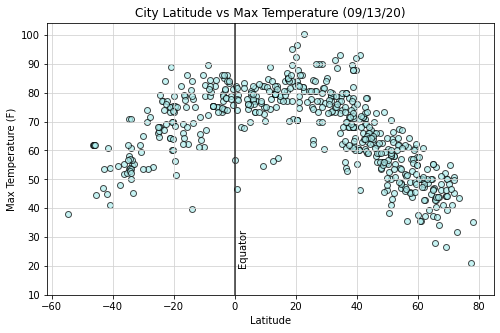

In [14]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Max Temperature (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.yticks(np.arange(10, max(weather_df["Max Temp"])*1.05, 10))
plt.savefig(os.path.join("..","output_data","lat_maxtemp.png"))


Using a scatter plot to visualize the relationship between the max temperature (how how a city can be) vs it's proximity to the equator. The closer to the equator, the hotter the cities can be

## Latitude vs. Humidity Plot

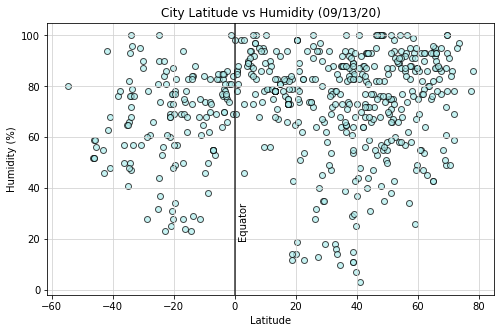

In [15]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Humidity (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_hum.png"))

Using a scatter plot to see if there is a relationship to be found between a city's proximity to the equator and how humid the city is. There is no apparent relationship, but a lot of the cities from the random sample of 500+ cities, seem to have a high % of humidity

## Latitude vs. Cloudiness Plot

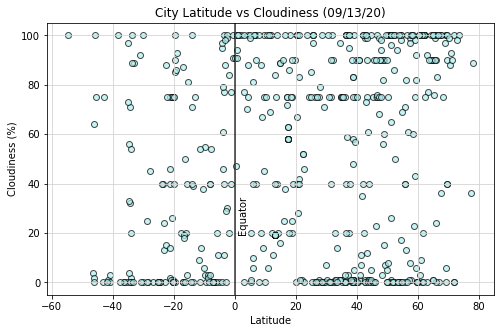

In [16]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Cloudiness (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_cloud.png"))

Using a scatter plot to see if there is a relationship between a city's proximity to the equator and how cloudy the city gets. There is no obvious relationship there

## Latitude vs. Wind Speed Plot

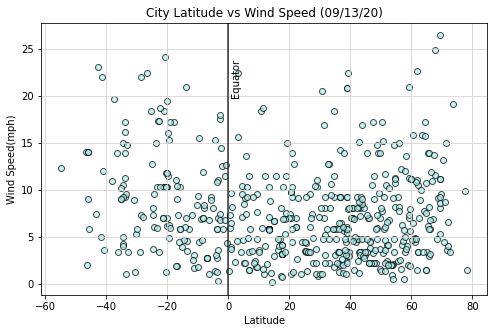

In [17]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Wind Speed (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_wind.png"))

Using a scatter plot to see if there is a relationship between a city's proximity to the equator and how windy the city is. There is no apparent relationship between these two variables

## Linear Regression

In [18]:
north_hem = weather_df.loc[weather_df["Lat"] >= 0][["Lat","Max Temp","Humidity","Wind Speed", "Cloudiness"]]
south_hem = weather_df.loc[weather_df["Lat"] < 0][["Lat","Max Temp","Humidity","Wind Speed", "Cloudiness"]]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.7867


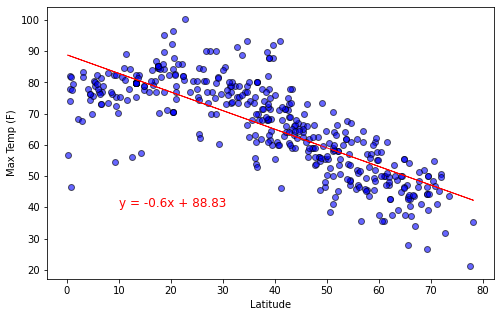

In [19]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Max Temp"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(10,40), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7426


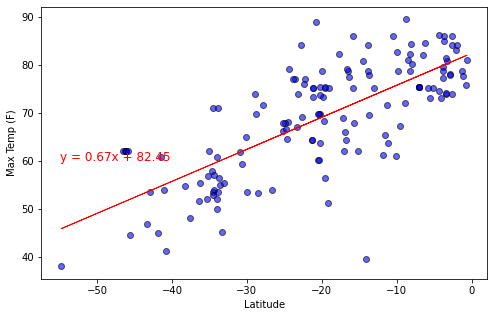

In [20]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Max Temp"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Max Temp"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,60), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")


print(f"The r-value is {round(rvalue,4)}")

After further looking into the relationship between the proximity of a city to the equator and it's max temperature, we found the is a direct correlation and the closer a city to the equator a city is, the higher it's max temperature is. Interesting to note that in the northen hemisphere this is a inverse correlation (the higher the latitude the further from the equator, hence the lower the max temp is). In the southern hemisphere the relationship is direct. since the latitude goes from -90 to 0.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.0165


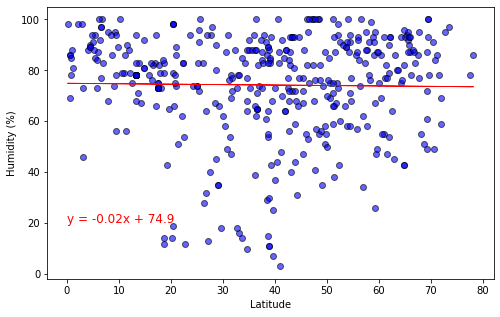

In [21]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Humidity"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Humidity"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(0,20), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.1529


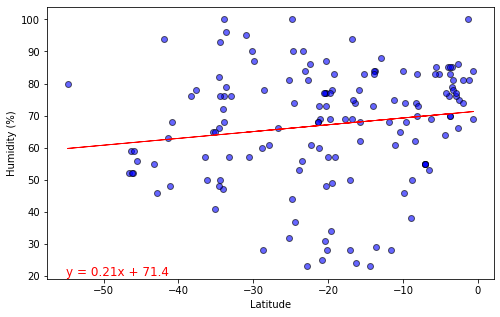

In [22]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Humidity"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Humidity"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,20), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


print(f"The r-value is {round(rvalue,4)}")

No correlation between the location of the city vs the equator and the humidity in that city

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0299


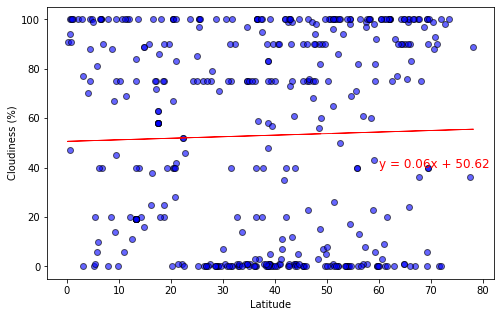

In [23]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Cloudiness"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(60,40), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0852


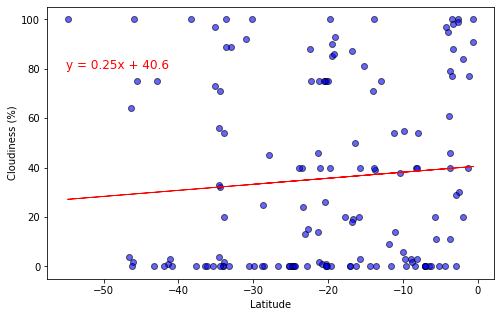

In [24]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Cloudiness"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,80), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


print(f"The r-value is {round(rvalue,4)}")

No correlation between a city's location and how cloudy the city is

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.1423


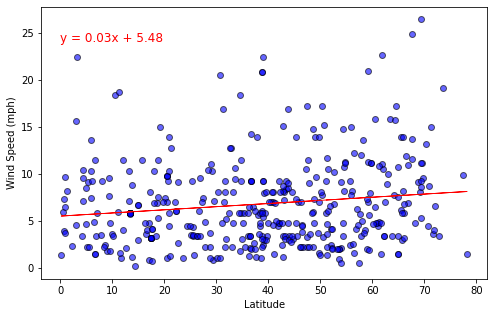

In [25]:
slope, intercept, rvalue, pvalue, stderr = linregress(north_hem["Lat"], north_hem["Wind Speed"])
regression_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(north_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(0,24), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is {round(rvalue,4)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2323


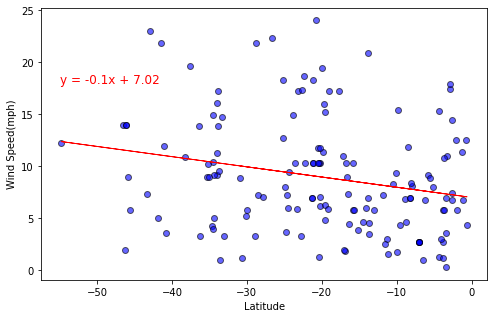

In [26]:
slope, intercept, rvalue, pvalue, stderr = linregress(south_hem["Lat"], south_hem["Wind Speed"])
regression_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize = (8,5))
plt.scatter(south_hem["Lat"], south_hem["Wind Speed"], facecolor="blue", edgecolor="black", alpha=0.6)
plt.plot(south_hem["Lat"], regression_values, color="red", linewidth= .9)
plt.annotate(line_eq,(-55,18), color='red', fontsize=12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")


print(f"The r-value is {round(rvalue,4)}")

No correlation between how windy a city is and it's proximity to the equator